In [72]:
import numpy as np
#%matplotlib qt
import matplotlib.pyplot as plt
import french

/Users/tgordon/research/rotation/french.py:68: RuntimeWarning: overflow encountered in exp
  s += np.sum(gamma * rho**(k / 3) * ((Tj / T) / (np.exp(Tj / T) - 1) - np.log(1 - np.exp(-Tj/T))))


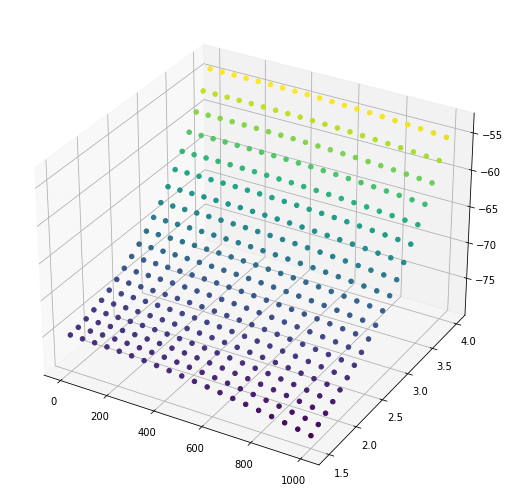

In [73]:
rho = np.linspace(1.5, 4.0, 20)
T = np.linspace(1, 1000, 20)
rho, T = np.meshgrid(rho, T)
f, s, p, u = french.french(rho, T, model='PBE')

fig = plt.figure(figsize = (14, 9))
ax = plt.axes(projection ='3d')
ax.scatter(T, rho, f, c=f, alpha=1)

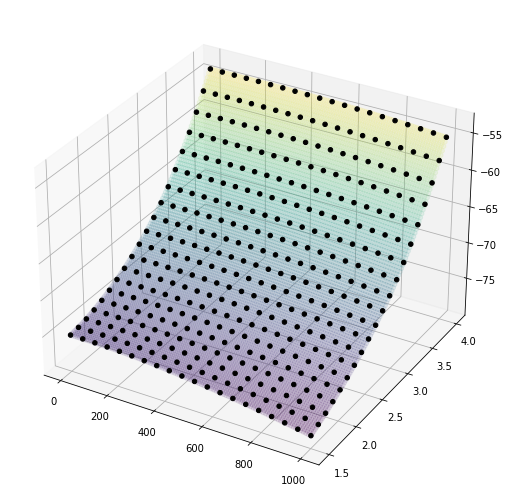

In [74]:
from scipy.interpolate import RectBivariateSpline

spl = RectBivariateSpline(T[:, 0], rho[0], f)

T_interp = np.linspace(0, 1000, 100)
rho_interp = np.linspace(1.5, 4.0, 100)
#f_interp = spl.ev(T_interp, rho_interp)

x, y = np.meshgrid(T_interp, rho_interp)
f_interp = spl.ev(x, y)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.scatter(x.flatten(), y.flatten(), f_interp.flatten(), c=f_interp.flatten(), alpha=0.1)
ax.scatter(T, rho, f, 'o', c='k', s=20, alpha=1)

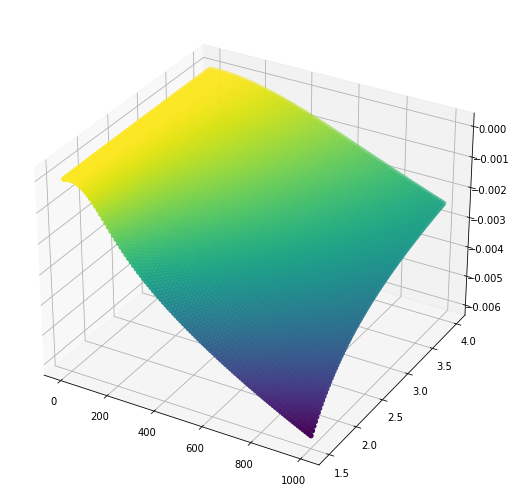

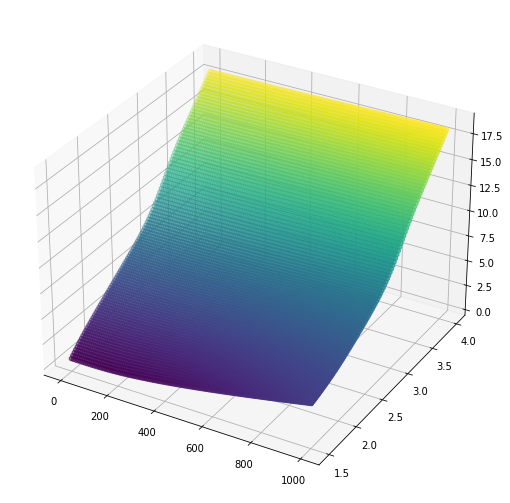

In [75]:
#dfdT = bisplev(T_interp, rho_interp, tck, dx=1).T
#dfdrho = bisplev(T_interp, rho_interp, tck, dy=1).T

x, y = np.meshgrid(T_interp, rho_interp)

dfdT = spl.ev(x, y, dx=1)
dfdrho = spl.ev(x, y, dy=1)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.scatter(x.flatten(), y.flatten(), dfdT.flatten(), c=dfdT.flatten())

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.scatter(x.flatten(), y.flatten(), dfdrho.flatten(), c=dfdrho.flatten())
#ax.scatter(p, T, g, 'o', c='k', s=20, alpha=1)

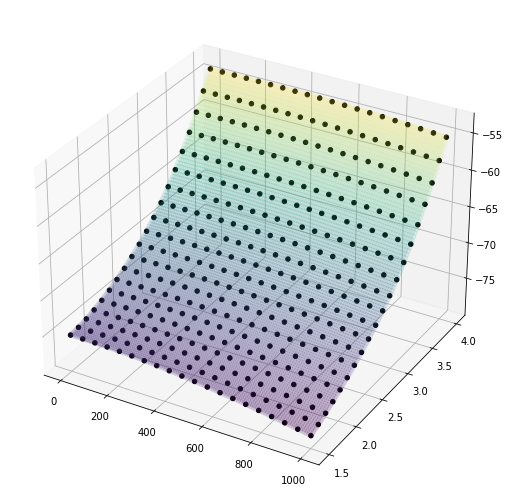

In [76]:
from scipy.interpolate import bisplrep, bisplev

tck = bisplrep(T, rho, f, kx=5, ky=5)

T_interp = np.linspace(0, 1000, 100)
rho_interp = np.linspace(1.5, 4.0, 100)
f_interp = bisplev(T_interp, rho_interp, tck).T

x, y = np.meshgrid(T_interp, rho_interp)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.scatter(x.flatten(), y.flatten(), f_interp.flatten(), c=f_interp.flatten(), alpha=0.1)
ax.scatter(T, rho, f, 'o', c='k', s=20, alpha=1)

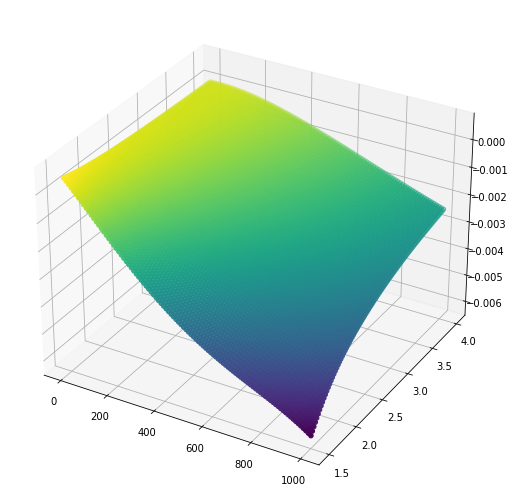

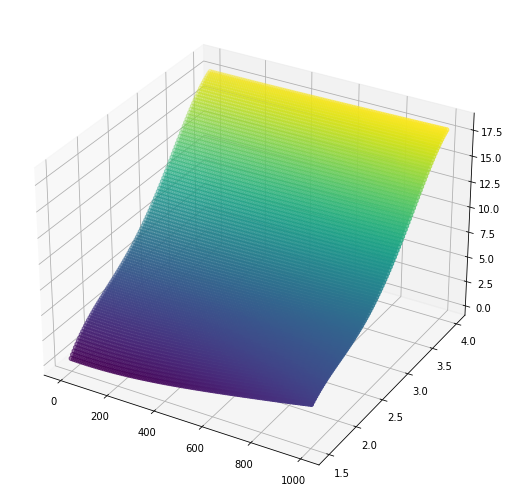

In [77]:
dfdT = bisplev(T_interp, rho_interp, tck, dx=1).T
dfdrho = bisplev(T_interp, rho_interp, tck, dy=1).T

x, y = np.meshgrid(T_interp, rho_interp)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.scatter(x.flatten(), y.flatten(), dfdT.flatten(), c=dfdT.flatten())

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.scatter(x.flatten(), y.flatten(), dfdrho.flatten(), c=dfdrho.flatten())
#ax.scatter(p, T, g, 'o', c='k', s=20, alpha=1)

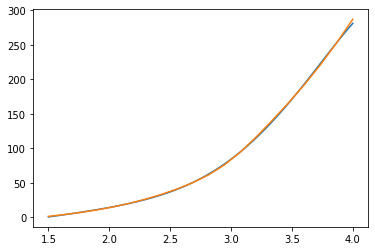

In [78]:
plt.plot(rho_interp, rho_interp * rho_interp * dfdrho[:, 0]);
plt.plot(rho[0], p[0])

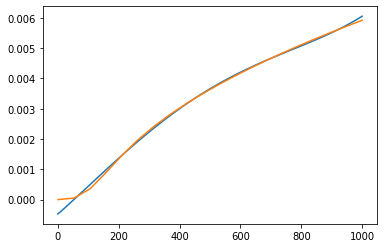

In [79]:
plt.plot(T_interp, -dfdT[0])
plt.plot(T[:, 0], s[:, 0])